# Clasificación de Datos
**Actividad 6**

Alicia Christyna Martínez Parra

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from utils import path_loader as p

In [13]:
# Load csv file
try:
    df = pd.read_csv(p.generate_file_path(
        file_name='avocado_prices_processed', file_extension='csv', directory='output'))

    n_row, n_col = df.shape
    print(f'CSV File loaded succesfully!\nThere are {n_row} rows and {n_col} columns')
except Exception as e:
    print(f'Something wrong happended!: {e}')

CSV File loaded succesfully!
There are 18249 rows and 13 columns


In [14]:
# Split the data
X = df.drop(columns=['type', 'year', 'region', 'date'])
y = df['type']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN Classifier
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Test the model and evaluate performance
y_pred = knn.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

conventional       0.97      0.95      0.96      1820
     organic       0.96      0.97      0.96      1830

    accuracy                           0.96      3650
   macro avg       0.96      0.96      0.96      3650
weighted avg       0.96      0.96      0.96      3650

Accuracy Score: 0.9638356164383561


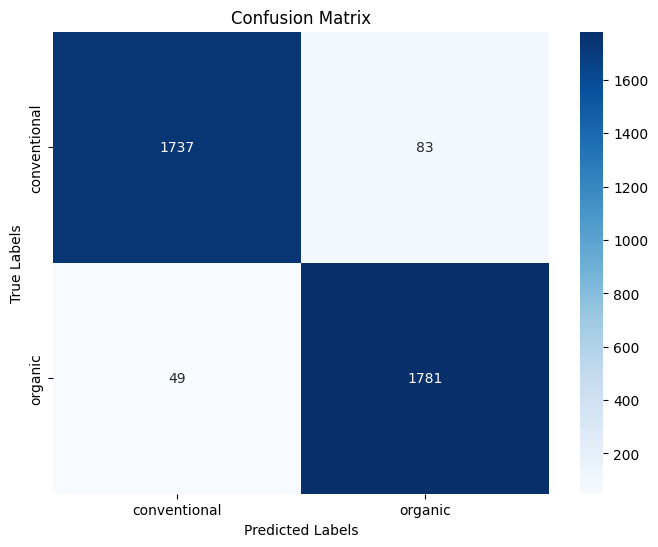

In [15]:
# Visualize the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()